# 프로젝트 1. 당뇨병 수치 예측하기

## (1) 데이터 가져오기

In [2]:
from sklearn.datasets import load_diabetes    # load_diabetes 데이터 셋을 가져와라. 당뇨병 진행 정도를 보여주는 데이터 셋

# pandas의 데이터프레임을 활용해서 sklearn 데이터셋을 표 형식으로 볼 수 있음
data = load_diabetes(as_frame=True)
df = data.frame    # pandas DataFrame
df.head()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646,151.0
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204,75.0
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930,141.0
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362,206.0
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641,135.0


sklearn에서 제공하는 데이터셋의 경우에는 데이터를 불러오는 기본적인 방식으로 아래와 같은 형식의 코드를 써야 데이터를 불러올 수 있다고 한다.
<br><br>
data = load_diabetes() → diabetes 데이터셋을 data 변수에 저장

df_X = data.data → 입력값들 (여러개의 특성을 가짐, 여러개 열)
df_y = data.target → 목표값 (특성들을 활용해서 모델이 예측하게 될 값들, 1줄짜리)

seaborn 데이터셋처럼 불러올 수 있나 싶어서 시도해봤더니 안 됨. 라이브러리마다 형식이 다름을 알 수 있었다.



## (2) 모델에 입력할 데이터 X, y 준비하기

In [3]:
# 입력 변수 X와 목표 변수 y로 데이터 분리
X = df.drop(columns='target').to_numpy()
y = df['target'].to_numpy()

<기존 코드>

import numpy as np

X = np.array(df_X)<br>
y = np.array(df_y)
<br>
<br>
기존 코드에서는 np.array를 썼는데, 사실 이미 numpy 배열인 걸 다시 감싼 거다.

이유 :
1. X가 리스트일 수도, DataFrame일 수도 있기 때문에 방어용으로 씀
2. 예전부터 가르칠 때 np.array 써라고 얘기했어서
<br>
※ 사실 계산용으로 안전하게 쓰려면 변수에 np.array를 쓰는 게 가장 안전하고 효율적이긴 하다. 다만 직관적으로 데이터를 보고 싶으면 데이터프레임을 이용하되, 나중에 계산하다가 에러가 뜨면 np.array를 써서 그때 X, y의 타입을 바꿔줘야 연산이 정상적으로 가능하다는 점을 참고하자.

## (3) train 데이터와 test 데이터로 분리하기

In [4]:
#  데이터를 훈련용(train)과 테스트용(test)으로 나누기
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

train_test_split 함수는 데이터를 훈련용과 테스트용으로 나누는 역할을 한다. 8:2 비율로 나누고, 데이터를 섞는 방법을 고정으로 해달라는 뜻이다.

42든 20이든 어떤 숫자를 넣어도 데이터는 '고정'된다. random_state는 난수 생성기의 시작점인데 시작점이 다를 뿐이고, 실행될 때마다 애초에 나온 랜덤 값이 그대로 유지된다.

## (4) 모델 준비하기

In [5]:
# w와 b 임의로 값 설정
import numpy as np
W = np.random.rand(X_train.shape[1])
b = np.random.rand()

X_train.shape[1] : 열(column)의 개수 = feature 개수를 의미.

각 feature마다 하나씩 가중치(weight)를 만들겠다는 뜻이다. 11이라고 작성해도 되는데, 나중에 수정할 때 불편할 수 있으니까.

In [6]:
# y=w1x1 + w2x2 + w3x3 + ... + w12x12 + b 수식을 코드로 구현해낸 함수
def model(X, W, b):
    predictions = 0
    for i in range(len(W)):
        predictions += X[:, i] * W[i]    # X[행, 열]
    predictions += b
    return predictions

## (5) 손실함수 loss 정의하기

In [7]:
# MSE 값 구하기
def MSE(a, b):
    mse = ((a - b) ** 2).mean()
    return mse

MSE : 제곱된 오차들의 평균.'예측값이 정답에서 평균적으로 얼마나 떨어져 있는지'를 나타낸다.
오차가 클수록 더 큰 패널티를 주며, mse가 출력한 값이 작을수록 오차가 적다는 것을 의미한다.

In [8]:
# 손실함수 만들기
def loss(X, W, b, y):
    predictions = model(X, W, b)
    L = MSE(predictions, y)
    return L

loss 함수는 model 함수를 돌려 + MSE의 값을 return하는 함수다.
즉 모델이 만든 값이 얼마나 오차가 나는지를 알려주는 함수.

그럼 MSE(predictions, y)만 쓰면 되는데 왜 굳이 한번 더 loss 함수를 쓰는 걸까?

1. 역할을 깔끔하게 나누기 위해서
2. 매번 같은 코드를 복붙할 필요가 없다.
3. 다음에 평가 함수를 다르게 쓰고 싶을 때 수정하기 편하다.

## (6) 기울기를 구하는 gradient 함수 구현하기

In [9]:
# 기울기 구하기
def gradient(X, W, b, y):
    N = len(y)

    y_pred = model(X, W, b)

    dW = 1/N * 2 * X.T.dot(y_pred - y)

    db = 2 * (y_pred - y).mean()
    return dW, db

dW, db = gradient(X, W, b, y)

선형 회귀 모델에서 W와 b의 값을 어떻게 바꿀지에 대한 방향을 정확히 계산하는 '기울기'를 구하는 함수다.
여기서 말하는 기울기는 최적의 선을 말하는 게 아니다. 데이터셋을 가장 잘 표현하는 최적의 선을 찾기 위해서는 최적의 w, b의 값을 찾아야 하는데, 그 값을 잘 찾기 위해서는 loss 값이 최저인 지점으로 갈 수 있는 방향을 알아야 한다. 그 방향을 알기 위해서 또 다른 기울기가 필요한데, 그 기울기를 구하는 계산식이 위의 코드다.
<br><br>
참고로 loss 함수는 선형 회귀 + MSE일 때만 U자형을 그린다고 한다. 그 외의 관계에서는 그래프 선이 들쑥날쑥할 수도 있어 '항상 내려가야 정답'이진 않다.
<br><br>
dW, db : w 또는 b를 1만큼 움직였을 때 loss가 얼마나 변하는가'를 나타내는 숫자.

## (7) 하이퍼 파라미터인 학습률 설정 + 모델 학습

In [10]:
# 최적의 w, b값 찾아 loss 줄이기
LEARNING_RATE = 0.001

losses = []

for i in range(1, 2001):      # 2001번 반복할 예정
    dW, db = gradient(X_train, W, b, y_train)
    W -= LEARNING_RATE * dW
    b -= LEARNING_RATE * db
    L = loss(X_train, W, b, y_train)   # 바뀐 w, b가 들어감
    losses.append(L)
    if i % 100 == 0:     # 100번마다 중간 점검
        print('Iteration %d : Loss %0.4f' % (i, L))

Iteration 100 : Loss 21725.0570
Iteration 200 : Loss 16545.9102
Iteration 300 : Loss 13073.0480
Iteration 400 : Loss 10743.4863
Iteration 500 : Loss 9179.9990
Iteration 600 : Loss 8129.8264
Iteration 700 : Loss 7423.6073
Iteration 800 : Loss 6947.8617
Iteration 900 : Loss 6626.5523
Iteration 1000 : Loss 6408.7306
Iteration 1100 : Loss 6260.2586
Iteration 1200 : Loss 6158.2622
Iteration 1300 : Loss 6087.4147
Iteration 1400 : Loss 6037.4462
Iteration 1500 : Loss 6001.4756
Iteration 1600 : Loss 5974.8921
Iteration 1700 : Loss 5954.6062
Iteration 1800 : Loss 5938.5479
Iteration 1900 : Loss 5925.3299
Iteration 2000 : Loss 5914.0228


여기서 w, b를 바꾼다. w, b의 값을 바꾸면서 줄어드는 loss값을 보여주는 코드로, w, b를 바꾸는 경사하강법 학습 루프다.

w -= LEARNING_RATE * dw <br>
b -= LEARNING_RATE * db <br>
→ ' -= '를 통해 기울기의 반대 방향으로 가겠다는 뜻

LEARNING_RATE : <br>
학습률(=하이퍼 파라미터)라고 부르며, 한 번에 얼마나 많이/적게 움직일지를 정한다.

## (8) test 데이터에 대한 성능 확인하기

In [11]:
# 모델 성능 평가
prediction = model(X_test, W, b)
mse = loss(X_test, W, b, y_test)
mse

np.float64(5166.214077979416)

학습을 통해 최적의 선을 찾음. 이 선과 test 데이터에 비교해보았을 때 생기는 오차를 보여준다.

## (9) 정답 데이터와 예측한 데이터 시각화하기

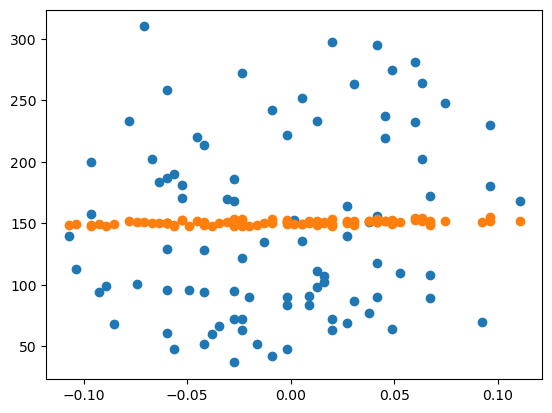

In [12]:
import matplotlib.pyplot as plt

plt.scatter(X_test[:, 0], y_test)
plt.scatter(X_test[:, 0], prediction)
plt.show()

X_test[:, 0] : <br>
X_test[행, 열]인데 1번째 열인 특성 x 1개에 대한 모든 데이터를 의미한다.

<br><br><br><br>

# 프로젝트 2. 자전거 대여량 예측하기

## (1) 데이터 가져오기

In [14]:
import pandas as pd

train = pd.read_csv("~/data/data/bike-sharing-demand/train.csv")
train.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


## (2) datetime 컬럼을 datetime 자료형으로 변환하고 연, 월, 일, 시, 분, 초까지 6가지 컬럼 생성하기

In [15]:
train['datetime'] = pd.to_datetime(train['datetime'])   # datetime 자료형으로 변환

# train['datetime'] 값을 각각 컬럼으로 분리
train['year'] = train['datetime'].dt.year
train['month'] = train['datetime'].dt.month
train['day'] = train['datetime'].dt.day
train['hour'] = train['datetime'].dt.hour
train['minute'] = train['datetime'].dt.minute
train['second'] = train['datetime'].dt.second

train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 18 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   datetime    10886 non-null  datetime64[ns]
 1   season      10886 non-null  int64         
 2   holiday     10886 non-null  int64         
 3   workingday  10886 non-null  int64         
 4   weather     10886 non-null  int64         
 5   temp        10886 non-null  float64       
 6   atemp       10886 non-null  float64       
 7   humidity    10886 non-null  int64         
 8   windspeed   10886 non-null  float64       
 9   casual      10886 non-null  int64         
 10  registered  10886 non-null  int64         
 11  count       10886 non-null  int64         
 12  year        10886 non-null  int32         
 13  month       10886 non-null  int32         
 14  day         10886 non-null  int32         
 15  hour        10886 non-null  int32         
 16  minute      10886 non-

train['year'] = train['datetime'].dt.year :
(datetime 자료형이라면) 년도, 월, 일 등을 따로 꺼내라는 뜻이다.

In [18]:
train.head()   # 뒤쪽에 year ~ second 컬럼 생겼음

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,year,month,day,hour,minute,second
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16,2011,1,1,0,0,0
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40,2011,1,1,1,0,0
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32,2011,1,1,2,0,0
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13,2011,1,1,3,0,0
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1,2011,1,1,4,0,0


## (3) year, month, day, hour, minute, second 데이터 개수 시각화하기

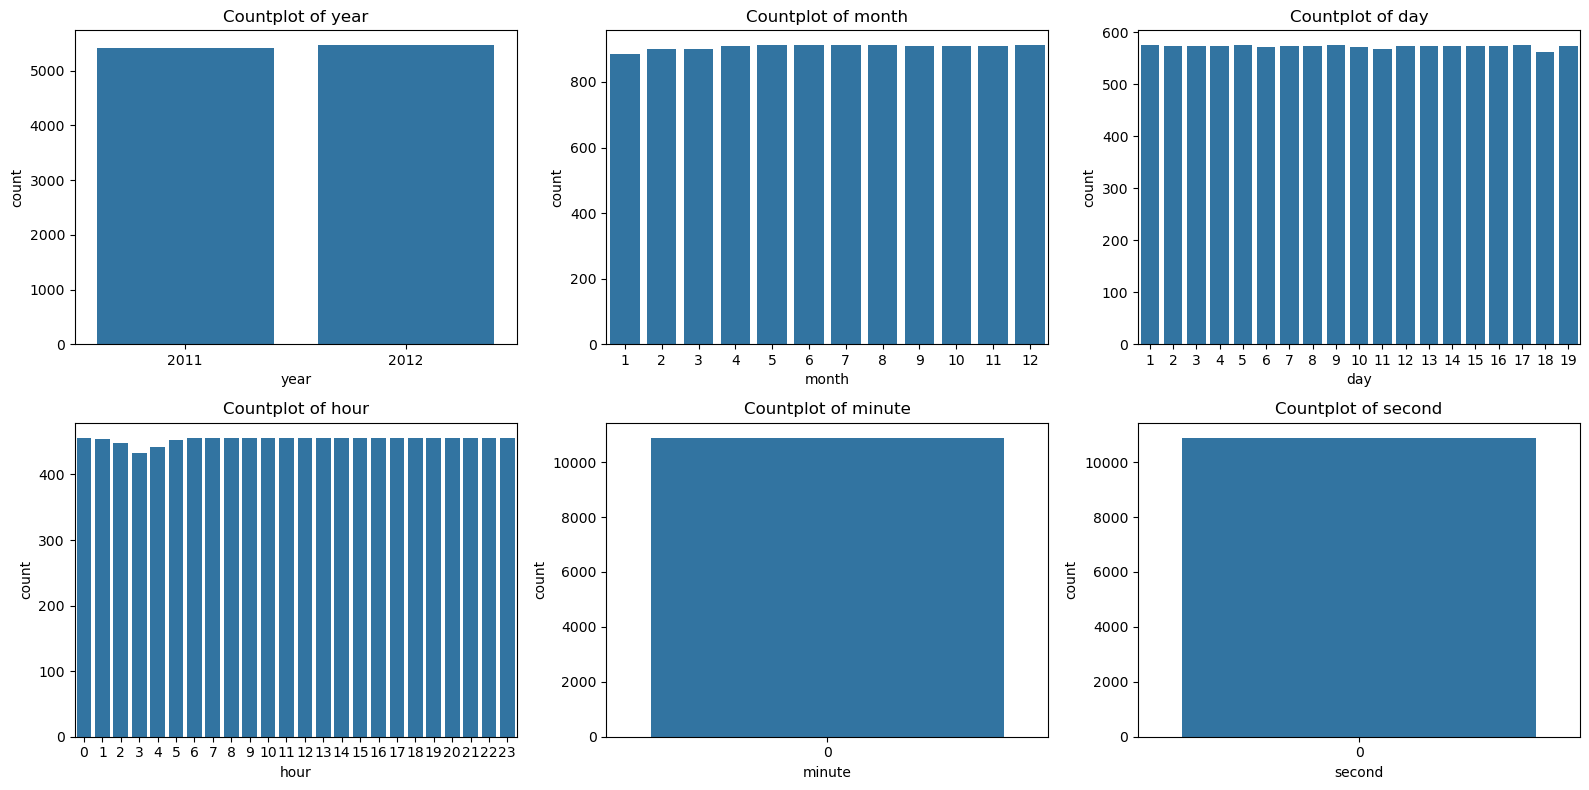

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, axs = plt.subplots(2, 3, figsize=(16, 8))    # 2행 3열, 총 6개의 그래프 공간 생성 + 그래프 사이즈 width=16, height=8
cols = ['year', 'month', 'day', 'hour', 'minute', 'second']
for ax, col in zip(axs.flatten(), cols):    # 그래프 1개, 컬럼 1개씩 매칭
    sns.countplot(x=col, data=train, ax=ax)    # x축에는 컬럼 넣고, data는 train 데이터를 써서, ax=ax 지정한 subplot에 빈도 막대 그래프를 그려라.
    ax.set_title(f'Countplot of {col}')    # 제목, 라벨 등이 겹치지 않도록 간격 자동 조정
plt.tight_layout()
plt.show()

## (4) X, y 컬럼 선택 및 train/test 데이터 분리

In [20]:
features = ['year', 'month', 'day', 'hour', 'temp', 'humidity', 'windspeed']

엄청 많은 feature들이 있었는데 사라졌다. 각각의 feature가 사라진 이유는 다음과 같다.


datetime <br>
문자열/시계열 객체 → 이미 year/month/day/hour 등으로 분해했으므로 필요 없음

atemp <br>
temp와 매우 높은 상관관계를 지닌다. → 중복 정보

casual, registered <br>
target 관련 컬럼 → 모델이 이미 예측해야 하는 값

count <br>
target 값으로 쓸 거라서 제외

minute, second <br>
자전거 대여량에는 거의 영향 없음

season, holiday, workingday, weather <br> 범주형 변수라서 원-핫 인코딩 필요


## (4-1) 컬럼을 제거한 근거 살펴보기

### atemp 컬럼을 제거한 이유

In [21]:
# 상관계수 계산
corr = train[['temp', 'atemp']].corr()
print(corr)

           temp     atemp
temp   1.000000  0.984948
atemp  0.984948  1.000000


상관계수가 거의 1에 가까우면 데이터가 중복이라고 봐도 무방하다고 한다.<br>
temp와 atemp의 상관계수를 보니 0.98로 높은 상관관계를 가지고 있으므로 데이터가 거의 일치한다고 판단하여 제거.

### target 컬럼을 제거한 이유

In [23]:
# count = casual + registered 확인
print((train['count'] == train['casual'] + train['registered']).all())

True


표에서 casual, registered, count 컬럼을 두고 비교했을 때 casual, registered를 합치면 count 값이 나오는 걸 알 수 있다. 어차피 count를 써야하는데 굳이 casual과 registered를 사용할 이유가 없다.

### minute, second 컬럼을 제거한 이유

In [25]:
train['minute'].unique(), train['second'].unique()

(array([0], dtype=int32), array([0], dtype=int32))

minute, second 컬럼의 고유값이 뭐 있는지 보니까 0 밖에 없음.

### 범주형 변수 원-핫 인코딩하기

In [27]:
train_encoded = pd.get_dummies(train, columns=['season', 'holiday', 'workingday', 'weather'])
train_encoded.head()

,datetime,temp,atemp,humidity,windspeed,casual,registered,count,year,month,...,season_3,season_4,holiday_0,holiday_1,workingday_0,workingday_1,weather_1,weather_2,weather_3,weather_4
0,2011-01-01 00:00:00,9.84,14.395,81,0.0,3,13,16,2011,1,...,False,False,True,False,True,False,True,False,False,False
1,2011-01-01 01:00:00,9.02,13.635,80,0.0,8,32,40,2011,1,...,False,False,True,False,True,False,True,False,False,False
2,2011-01-01 02:00:00,9.02,13.635,80,0.0,5,27,32,2011,1,...,False,False,True,False,True,False,True,False,False,False
3,2011-01-01 03:00:00,9.84,14.395,75,0.0,3,10,13,2011,1,...,False,False,True,False,True,False,True,False,False,False
4,2011-01-01 04:00:00,9.84,14.395,75,0.0,0,1,1,2011,1,...,False,False,True,False,True,False,True,False,False,False


In [28]:
# season별 평균 대여량
print(train.groupby('season')['count'].mean())
print("\n")

# holiday별 평균 대여량
print(train.groupby('holiday')['count'].mean())
print("\n")

# workingday별 평균 대여량
print(train.groupby('workingday')['count'].mean())
print("\n")

# weather별 평균 대여량
print(train.groupby('weather')['count'].mean())

season
1    116.343261
2    215.251372
3    234.417124
4    198.988296
Name: count, dtype: float64


holiday
0    191.741655
1    185.877814
Name: count, dtype: float64


workingday
0    188.506621
1    193.011873
Name: count, dtype: float64


weather
1    205.236791
2    178.955540
3    118.846333
4    164.000000
Name: count, dtype: float64


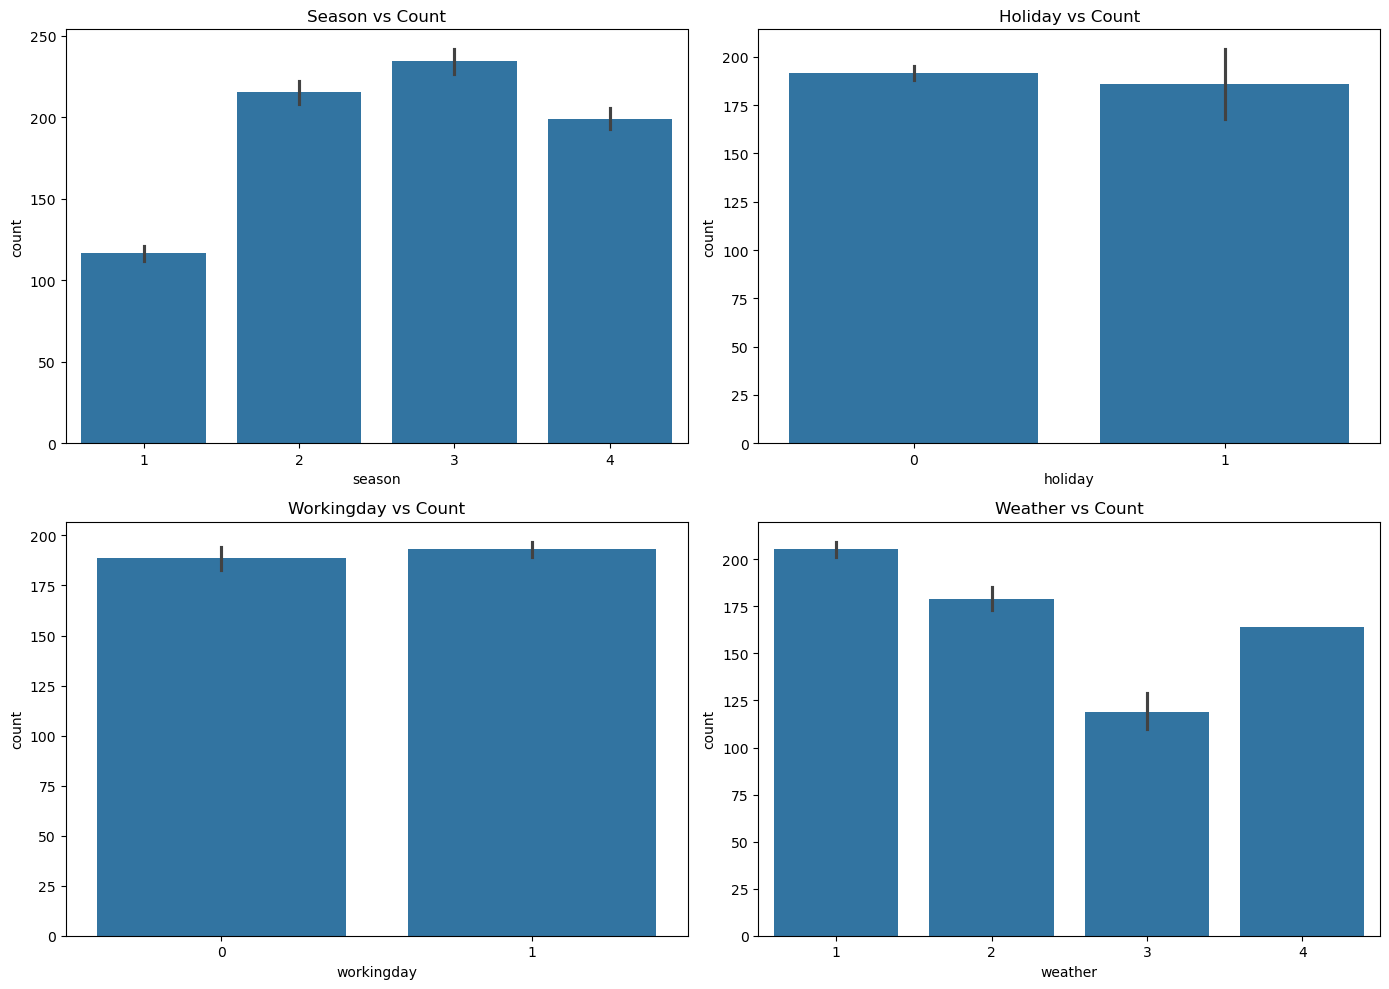

In [29]:
import seaborn as sns
import matplotlib.pyplot as plt

fig, axs = plt.subplots(2, 2, figsize=(14,10))

sns.barplot(x='season', y='count', data=train, ax=axs[0,0])
axs[0,0].set_title("Season vs Count")

sns.barplot(x='holiday', y='count', data=train, ax=axs[0,1])
axs[0,1].set_title("Holiday vs Count")

sns.barplot(x='workingday', y='count', data=train, ax=axs[1,0])
axs[1,0].set_title("Workingday vs Count")

sns.barplot(x='weather', y='count', data=train, ax=axs[1,1])
axs[1,1].set_title("Weather vs Count")

plt.tight_layout()
plt.show()

1) season - 자전거 대여량 관계
여름, 가을(2,3)이 봄, 겨울에 비해 대여량이 좀 높은 편이다. → 대여량에 어느정도 영향을 미친다고 볼 수 있다.

2) holiday - 자전거 대여량 관계
주말이냐 아니냐가 그렇게 영향을 미치진 않는 것 같다.

3) workingday - 자전거 대여량 관계
평일, 주말도 대여량이 비슷하다.

4) weather - 자전거 대여량 관계
날씨에 따라 대여량 차이가 나는 걸 볼 수 있다.<br>
맑을 때(1)는 대여량이 많은데 눈(3)이 오는 날은 확실히 적다.

In [30]:
# 자전거 대여량에게 영향을 미치는 컬럼만 남김
features = ['year', 'month', 'day', 'hour', 'temp', 'humidity', 'windspeed', 'season', 'weather']

X = train[features]
y = train['count']

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## (5) LinearRegression 모델 학습

In [32]:
# LinearRegression을 이용해서 다중 선형 회귀 모델 학습시키
from sklearn.linear_model import LinearRegression

model = LinearRegression()   # 모델 준비
model.fit(X_train, y_train)    # 모델 학습

y_pred = model.predict(X_test)   # 모델 예측 값 저장

## (6) 학습된 모델로 X_test에 대한 예측값 출력 및 손실함수값 계산

In [33]:
from sklearn.metrics import mean_squared_error   # 모델 성능을 평가하는 도구
import numpy as np

mse = mean_squared_error(y_test, y_pred)    # mse로 오차 확인
rmse = np.sqrt(mse)   # rmse로 출력값 바꿈

print("RMSE:", rmse)

RMSE: 141.26533138768266


RMSE는 MSE에 루트 씌운 값이다. 그러면 원래 단위로 해석할 수 있어서 사람이 이해하기 쉽다.<br>
실제 단위로 보면 되기 때문에, 평균 대여량 141개 정도의 오차가 났음을 볼 수 있다.
→ 원래 모범답안에서는 season, weather을 따로 넣지 않은 상태에서 모델을 돌렸는데, 유의미한 컬럼이라고 생각하여 특성을 추가해서 돌린 모델과 이전 모델을 비교해봤을 때 큰 차이가 없었다. 고로... 넣으나 마나 의미없었던 feature였던 걸로..

## (7) x축은 temp 또는 humidity로, y축은 count로 예측 결과 시각화하기

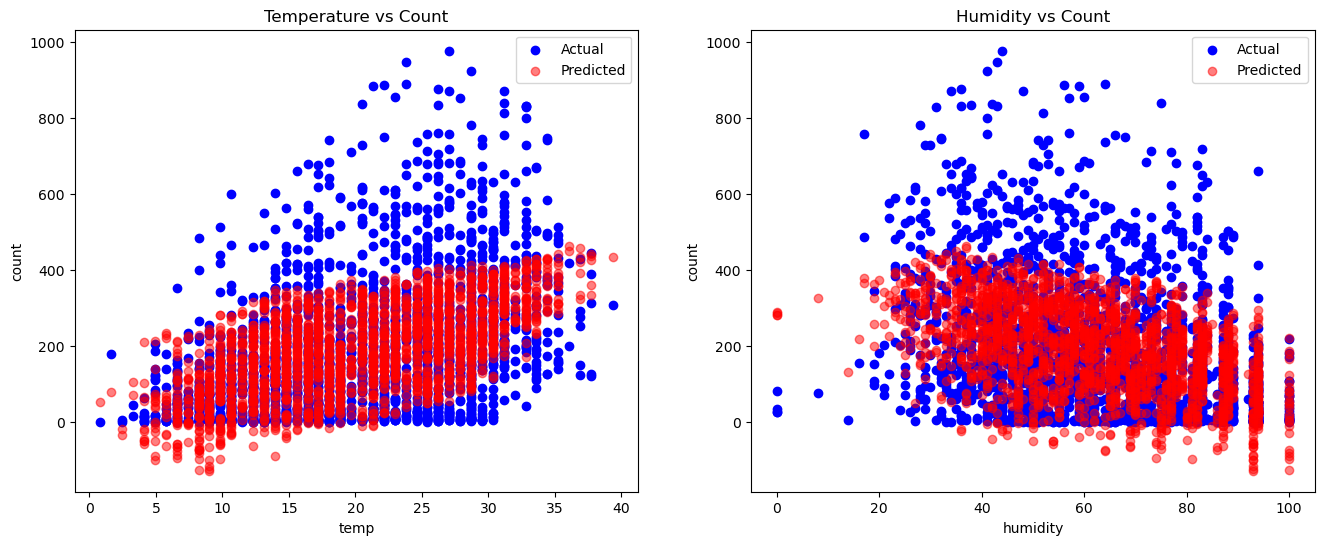

In [34]:
fig, axs = plt.subplots(1, 2, figsize=(16, 6))

# temperature에 따른 예측값과 실제값 비교
axs[0].scatter(X_test['temp'], y_test, color='blue', label='Actual')
axs[0].scatter(X_test['temp'], y_pred, color='red', label='Predicted', alpha=0.5)
axs[0].set_xlabel('temp')
axs[0].set_ylabel('count')
axs[0].set_title('Temperature vs Count')
axs[0].legend()

# humidity에 따른 예측값과 실제값 비교
axs[1].scatter(X_test['humidity'], y_test, color='blue', label='Actual')
axs[1].scatter(X_test['humidity'], y_pred, color='red', label='Predicted', alpha=0.5)
axs[1].set_xlabel('humidity')
axs[1].set_ylabel('count')
axs[1].set_title('Humidity vs Count')
axs[1].legend()

# 회고

- 이번 프로젝트를 하면서 느낀점, 배운점
수업의 내용을 잘 이해하고 흡수하고 싶어서 욕심을 부렸습니다. 중점적으로 봐야하는 내용 위주로 보려고 노력은 했으나 기초가 부족해서 그런지 흐름 자체를 이해함에 있어서도 시간이 꽤 오래 걸렸습니다. 당분간은 부족한 부분을 메꾸기 위해서 시간을 갈아야겠다는 생각이 많이 듭니다. 거저 얻는 것은 없다는 마음가짐입니다. 

- 이번 프로젝트에서 잘 했다고 생각이 드는 점.
노력 많이 했습니다..! 그래서 코드와 머신러닝 모델 학습의 기초적인 흐름을 이해할 수 있어 뿌듯했습니다.

- 이번 프로젝트에서 느낀 문제점.
시간이 많이 부족하다 부분만 빼고는 없습니다. 수업 내용도 유익하고 배울 점이 많다는 생각이 많이 들었습니다.